<a href="https://colab.research.google.com/github/hammedb197/detectron_u/blob/master/document_tag_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !kaggle datasets download -d nbhativp/first-half-training

# New Section

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
%cd My\ Drive

/gdrive/My Drive


In [0]:
# %mkdir document_classification

In [0]:
%cd document_classification

/gdrive/My Drive/document_classification


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hammedb","key":"ef110e556969c19279be1f9358d6b0f2"}'}

In [0]:
!ls

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 63 Apr  2 11:09 kaggle.json
{"username":"hammedb","key":"ef110e556969c19279be1f9358d6b0f2"}

In [0]:
!kaggle datasets download -d nbhativp/first-half-training

100% 13.0G/13.0G [03:40<00:00, 60.2MB/s]
100% 13.0G/13.0G [03:40<00:00, 63.4MB/s]


In [0]:
!unzip -q first-half-training.zip

In [0]:
!ls  Training_half/

In [0]:
# !unzip first-half-training.zip
!ls base_dir

In [0]:
!ls

base_dir  data	first-half-training.zip  kaggle.json  Training_half


In [0]:
import os
import pandas as pd

In [0]:
data_dir =  'Training_half/'

In [0]:
classes = {'letter': 0,
   'form': 1,
   'email': 2,
   'handwritten': 3,
   'advertisement': 4,
   'scientific report': 5,
   'scientific publication': 6,
   'specification': 7,
   'file folder': 8,
   'news article': 9,
   'budget': 10,
   'invoice': 11,
   'presentation': 12,
   'questionnaire': 13,
   'resume': 14,
   'memo': 15}

In [0]:
labels = []
save_keys = []
save_label = []
for file in sorted(os.listdir(data_dir)):
  for k, v in classes.items():
    if k in file:
      label = dict()
      label[file] = v
      labels.append(label)
      save_keys.append(file)
      save_label.append(v)
      break


In [0]:
from sklearn.utils import shuffle
labels = shuffle(labels)

In [0]:
# save_label = shuffle(save_label)

In [0]:
labels[433:436]

[{'letter9624.tif': 0}, {'budget2981.tif': 10}, {'letter5643.tif': 0}]

In [0]:
df_dict = {'filename': save_keys, 'class': save_label}

In [0]:
label_df = pd.DataFrame(df_dict)

In [0]:
label_df.tail()

,filename,class
159994,memo1.tif,15
159995,memo10.tif,15
159996,memo100.tif,15
159997,memo1000.tif,15
159998,memo10000.tif,15


In [0]:
label_df['class'].value_counts()

0     20106
3     20034
8     20022
10    20010
4     19963
1     19957
2     19954
11    19947
15        6
Name: class, dtype: int64

In [0]:
labels[400]

{'invoice7236.tif': 11}

In [0]:
import matplotlib.pyplot as plt


In [0]:
 temp_dict = labels[-1]
#  print(temp_dict)
 for k,v in temp_dict.items():
    image= plt.imread(k)
    print(image.shape)
    plt.imshow(image)

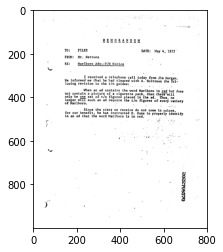

In [0]:
import cv2
image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
plt.imshow(image)

In [0]:
# label_df

In [0]:
values = label_df['class'].value_counts().sort_index()
values
#check value coutn for each of the classes

0     20106
1     19957
2     19954
3     20034
4     19963
8     20022
10    20010
11    19947
15        6
Name: class, dtype: int64

In [0]:
list(values.index)

[0, 1, 2, 3, 4, 8, 10, 11, 15]

In [0]:
cat = label_df['class'].unique().tolist()
def get_category(cat):
    column = []
    for i in cat:
      if i in classes.values():
        column.append(classes.keys())
    return column



In [0]:
list(classes.keys())

['letter',
 'form',
 'email',
 'handwritten',
 'advertisement',
 'scientific report',
 'scientific publication',
 'specification',
 'file folder',
 'news article',
 'budget',
 'invoice',
 'presentation',
 'questionnaire',
 'resume',
 'memo']

In [0]:
# !ls Training_half/
!mkdir base_dir

In [0]:
!ls 

base_dir  first-half-training.zip  kaggle.json	Training_half


In [0]:
!pwd
base_dir = 'base_dir'

/gdrive/My Drive/document_classification


In [0]:
for i in classes.values():
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [0]:
if not os.path.exists(base_dir): os.mkdir(base_dir)

for i in list(values.index):
    train_each_dir = os.path.join(base_dir, str(i))
    if not os.path.exists(train_each_dir): os.mkdir(train_each_dir)

In [0]:
!ls  base_dir

0  1  10  11  15  2  3	4  8


In [0]:
import shutil

In [0]:
for f, category in  enumerate(label_df['class'].unique()):

    categories = label_df[label_df['class'] == category]['filename'].tolist()
    # print(categories[:1000])
    for train_image_name in categories[:2000]: 
        train_src = os.path.join('Training_half/', train_image_name)         
        train_dst = os.path.join(base_dir, str(category), train_image_name)
        shutil.copyfile(train_src, train_dst)
    

In [0]:
!ls base_dir/15

memo0.tif  memo10000.tif  memo1000.tif	memo100.tif  memo10.tif  memo1.tif


In [0]:
# !pip3 install Tensorflow
img_width = 224
img_height = 224
batch_size = 64

In [0]:

import tensorflow as tf
model = tf.keras.applications.VGG16(include_top=False,
                                               weights='imagenet', input_shape = (img_width, img_height, 3),)

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
base_dir = 'base_dir/'

In [0]:
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split


In [0]:
%cd ..

/gdrive/My Drive/scanned_document/kaggle_d/base_dir


In [0]:

train_generator = train_datagen.flow_from_directory(
    'base_dir',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')



Found 12805 images belonging to 9 classes.


In [0]:
validation_generator = train_datagen.flow_from_directory(
    'base_dir', # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 3201 images belonging to 9 classes.


In [0]:
batch_size=64
nb_epochs = 10

In [0]:
train_generator.samples

12805

In [0]:
%ls

base_dir/  data/  first-half-training.zip  kaggle.json  Training_half/


In [0]:
os.listdir('base_dir')


['0', '1', '2', '3', '4', '8', '10', '11', '15']

In [0]:
from tensorflow.keras import layers, models, optimizers 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten



In [0]:
x = model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(9, activation='softmax')(x)

model_3 = models.Model(inputs=model.input, outputs=x)
print(model_3.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model.input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [0]:
model_3.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [0]:
model_3.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
200/200 [==============================] - 2334s 12s/step - loss: 2.3047 - accuracy: 0.2512 - val_loss: 1.6177 - val_accuracy: 0.3978
Epoch 2/10
200/200 [==============================] - 2354s 12s/step - loss: 1.5633 - accuracy: 0.4123 - val_loss: 1.4942 - val_accuracy: 0.4656
Epoch 3/10
200/200 [==============================] - 2338s 12s/step - loss: 1.3567 - accuracy: 0.5085 - val_loss: 1.2282 - val_accuracy: 0.5691
Epoch 4/10
200/200 [==============================] - 2315s 12s/step - loss: 1.1999 - accuracy: 0.5664 - val_loss: 1.2357 - val_accuracy: 0.5797
Epoch 5/10
200/200 [==============================] - 2322s 12s/step - loss: 1.0924 - accuracy: 0.6142 - val_loss: 1.0662 - val_accuracy: 0.6325
Epoch 6/10
200/200 [==============================] - 2282s 11s/step - loss: 1.0045 - accuracy: 0.6497 - val_loss: 0.9829 - val_accuracy: 0.6669
Epoch 7/10
200/200 [==============================] - 

In [0]:
model_3.save('model.h5')

In [0]:
%ls

base_dir/  first-half-training.zip  kaggle.json  model.h5  Training_half/


In [0]:
from google.colab import files
files.download('model.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47664, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import os
import numpy as np

In [0]:
cp model.h5 new_model.h5

In [0]:
pred= model_3.predict_generator(validation_generator, validation_generator.samples // batch_size)


In [0]:
print(pred)

[[4.5094686e-03 1.2517135e-01 7.5567663e-01 ... 5.0126067e-03
  9.6683111e-03 2.6895046e-02]
 [2.1141769e-02 8.9141168e-03 6.0341763e-03 ... 1.4022689e-05
  3.5797132e-03 2.7800681e-06]
 [9.6875226e-01 2.8515521e-02 6.7809602e-04 ... 1.2802971e-05
  1.3275957e-03 6.2431222e-06]
 ...
 [4.6265454e-04 1.1020983e-03 3.8095887e-03 ... 8.1255374e-04
  9.1021101e-04 9.9192727e-01]
 [3.1547495e-03 1.3287357e-02 6.4348998e-03 ... 1.2595877e-02
  9.0749842e-01 5.1210962e-02]
 [1.2250216e-02 1.3323064e-01 2.3422076e-01 ... 5.2072573e-04
  5.9248880e-03 1.3260042e-03]]


In [0]:
!ls

base_dir		 kaggle.json  new_model.h5
first-half-training.zip  model.h5     Training_half


In [0]:
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())

In [0]:
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels[str(k) for k in predicted_class_indices]


In [0]:
print(predicted_class_indices)
print (labels)
print (predictions)